# Title

Description of the notebook.

In [6]:
import ipywidgets as widgets
from IPython.display import display

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
file_path = '/content/drive/My Drive/Curso AAPG/'

dataset = pd.read_csv(file_path + 'train.csv')

In [3]:
dataset.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE
707871,33/6-3 S,3383.857200,444882.31250,6829461.5,-3213.679688,SHETLAND GP.,Tryggvason Fm.,12.130768,NaN,2.023496,2.064719,NaN,75.584610,NaN,0.266725,NaN,87.794655,NaN,12.250001,34.797844,182.763168,NaN,NaN,NaN,NaN,33.588371,NaN,2,1.0
797730,34/10-35,2103.463000,463383.75000,6771049.0,-2080.289551,SHETLAND GP.,Vaale Fm.,19.992468,NaN,1.440493,1.835467,2.340607,36.262012,NaN,NaN,4.161705,109.323425,42.484207,NaN,NaN,NaN,NaN,0.037043,NaN,NaN,NaN,NaN,1,1.0
662899,31/5-4 S,169.502000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.644459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
440438,25/9-1,1353.454000,483537.40625,6590314.0,-1328.341919,HORDALAND GP.,Skade Fm.,12.336649,0.968997,0.968829,1.046127,NaN,83.057114,NaN,NaN,NaN,NaN,83.272926,12.250001,45.860069,NaN,NaN,NaN,0.152180,0.747436,NaN,0.963200,2,1.0
359526,25/5-4,2520.152305,470379.09375,6608138.5,-2494.553711,ROGALAND GP.,Ty Fm.,11.535963,NaN,0.822408,0.629468,2.260348,42.104477,NaN,NaN,5.524782,77.477539,98.744492,12.250001,NaN,NaN,-0.714036,0.012172,NaN,NaN,NaN,-999.900024,0,1.0
447054,25/9-1,2359.086000,483525.40625,6590324.5,-2333.808350,DUNLIN GP.,Statfjord Fm.,8.676250,0.342555,0.350771,0.405441,2.221663,73.561386,NaN,0.337026,4.597466,97.533524,NaN,8.500000,13.676760,NaN,NaN,0.047175,0.152180,0.421178,NaN,0.345128,0,1.0
608223,31/3-1,1623.189000,540001.06250,6738653.0,-1599.966309,VIKING GP.,Fensfjord Fm.,12.544712,1.028082,1.082842,1.010681,2.246576,72.881477,NaN,0.263291,NaN,104.837524,122.908516,12.250001,NaN,NaN,NaN,-0.012539,NaN,1.026591,NaN,NaN,0,1.0
70116,16/10-1,2175.559790,444159.00000,6435556.5,-2150.419189,ROGALAND GP.,Sele Fm.,12.507703,NaN,0.576884,0.445056,2.267315,80.335388,NaN,0.353339,3.468053,135.991882,84.908302,12.500000,13.733349,NaN,0.007703,-0.014009,0.170153,NaN,NaN,NaN,2,1.0
25291,15/9-15,1552.448000,436812.90625,6462993.0,-1527.401001,HORDALAND GP.,Utsira Fm.,12.929733,0.934801,0.934801,0.889914,2.001378,79.615250,NaN,0.518844,2.063795,162.173233,66.044250,12.250001,62.345482,NaN,0.679734,0.042939,0.136602,NaN,NaN,0.511415,2,1.0
853484,34/2-4,1310.481436,482076.53125,6847169.5,-1277.449219,NORDLAND GP.,NaN,18.510151,NaN,2.155687,2.433279,NaN,70.592232,NaN,NaN,NaN,116.159836,24.534307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0


Iniciaremos nosso worfklow observando as algumas características do dataset e das suas variáveis.

O primeiro passo é observar quais são as variáveis presentes que podem nos auxiliar para montar nosso modelo preditivo.

O dataset contém as seguintes informações:
* WELL: nome do poço;
* DEPTH_MD: profundidade medida;
* X_LOC: coordenada UTM X; 
* Y_LOC: coordenada UTM Y;
* Z_LOC: profundidade Z;
* GROUP: grupo litoestratigráfico;
* FORMATION: formação litoestratigráfica;

As colunas a seguir, contidas no dataset, são referentes às curvas de geofísica de poço, dentre outras curvas:
* BS: tamanho da broca;
* CALI: caliper;
* RDEP: resistividade profunda;
* RHOB: densidade;
* GR: raios gama;
* SGR: raios gama espectral;
* RMED: resistividade média;
* ROP: taxa de penetração;
* NPHI: porosidade neutrão;
* PEF: fator de absorção fotoelétrico;
* RSHA: resistividade rasa;
* DTS: sônico (cisalhante)
* DTC: sônico (compressional)

Possui ainda colunas referentes a litologia, o que queremos predizer:
* LITHOLOGY: tipo de rocha;
* CONFIDENCE: confiança na interpretação dessa litologia (1: alta, 2: média, 3: baixa).

É importante também ter uma noção básica da distribuição dos valores de cada variável. A célula abaixo nos mostrará alguns parâmetros estatísticos, onde:
* count: contagem do número de registros dessa variável;
* mean: valor médio;
* std: desvio-padrão;
* min: valor mínimo:
* 25%: percentil 25;
* 50%: percentil 50 ou mediana;
* 75%: percentil 75;
* max: valor máximo.

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH_MD,1170511.0,2.184087e+03,997.182105,1.360860e+02,1.418597e+03,2.076605e+03,2.864393e+03,5.436632e+03
X_LOC,1159736.0,4.856310e+05,34556.414531,4.268988e+05,4.547996e+05,4.769203e+05,5.201532e+05,5.726328e+05
Y_LOC,1159736.0,6.681276e+06,128152.434683,6.406641e+06,6.591327e+06,6.737311e+06,6.784886e+06,6.856661e+06
Z_LOC,1159736.0,-2.138527e+03,970.942584,-5.395563e+03,-2.811502e+03,-2.042785e+03,-1.391866e+03,-1.110860e+02
CALI,1082634.0,1.318568e+01,3.798907,2.344000e+00,9.429712e+00,1.255575e+01,1.671075e+01,2.827900e+01
RSHA,630650.0,1.069466e+01,100.642597,1.000000e-04,8.541203e-01,1.399020e+00,3.099348e+00,2.193905e+03
RMED,1131518.0,4.986978e+00,54.672687,-8.418695e-03,9.140862e-01,1.443584e+00,2.680930e+00,1.988616e+03
RDEP,1159496.0,1.069103e+01,113.948005,3.170056e-02,9.102396e-01,1.439000e+00,2.557220e+00,1.999887e+03
RHOB,1009242.0,2.284987e+00,0.253284,7.209712e-01,2.092203e+00,2.321228e+00,2.488580e+00,3.457820e+00
GR,1170511.0,7.091370e+01,34.231486,1.092843e-01,4.762722e+01,6.836763e+01,8.903551e+01,1.076964e+03


Algo que devemos fazer é observar o comportamento dessas curvas nos poços. As células abaixo nos permitem visualizar os diferentes poços contidos no nosso dataset.

Primeiramente, execute a célula abaixo para criar uma função que será utilizada pra visualizar os poços.

In [12]:
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = ListedColormap(['yellow', 'yellowgreen', 'forestgreen', 'springgreen', 'teal',
                       'steelblue', 'darkslategray', 'paleturquoise', 'darkturquoise',
                       'saddlebrown', 'grey', 'orangered'])

def plot_well(dataframe, well_number):

  well_name = dataframe.WELL.unique()[well_number]

  well = dataframe[dataframe.WELL == well_name]

  assert well_number < len(dataframe.WELL.unique()), f'Insert well number between 0 and {len(dataframe.WELL.unique())}'
  
  lithology_keys = {0: ['Sandstone', 'yellow'],
                 1: ['Sandstone/Shale', 'yellowgreen'],
                 2: ['Shale', 'forestgreen'],
                 3: ['Marl', 'springgreen'],
                 4: ['Dolomite', 'teal'],
                 5: ['Limestone', 'steelblue'],
                 6: ['Chalk', 'darkslategray'],
                 7: ['Halite', 'paleturquoise'],
                 8: ['Anhydrite', 'darkturquoise'],
                 9: ['Tuff', 'saddlebrown'],
                 10: ['Coal', 'grey'],
                 11: ['Basement', 'orangered']}

  fig, ax = plt.subplots(1, 6, figsize = (30, 15), sharey = False)

  ax[0].plot(well.CALI, well.DEPTH_MD, color = 'black',
             label = 'Caliper')
  ax[0].plot(well.BS, well.DEPTH_MD, color = 'red',
           label = 'Bit Diameter')
  ax[0].grid()
  ax[0].set_title('Caliper')

  ax[1].set_title('Gamma Ray')
  ax[1].plot(well.GR, well.DEPTH_MD, color = 'green',
           label = 'Gamma Ray', linewidth = '0.5')
  ax[1].set_xlim(0, 150)
  axtwin1 = ax[1].twiny()
  axtwin1.plot(well.GR, well.DEPTH_MD, 'g--',
           label = 'Gamma Ray', linewidth = 0.5)
  axtwin1.set_xlim(150, 300)
  ax[1].grid()
  #ax[1].invert_yaxis()

  ax[2].set_title('Resistivity')
  ax[2].semilogx(well.RDEP, well.DEPTH_MD, color = 'r',
           label = 'Deep Res.', linewidth = '0.5')
  ax[2].semilogx(well.RMED, well.DEPTH_MD, color = 'm',
           label = 'Med. Res.', linewidth = '0.5')
  ax[2].semilogx(well.RSHA, well.DEPTH_MD, color = 'k',
           label = 'Shallow Res.', linewidth = '0.5')
  ax[2].set_xlim(0.2 , 2000)
  #ax[2].set_xticks([0.2, 2, 20, 200, 2000])
  ax[2].grid()
  #ax[2].invert_yaxis()
  ax[2].legend()

  ax[3].set_title('Sonic')
  ax[3].plot(well.DTC, well.DEPTH_MD, color = 'k',
             label = 'Sonic', linewidth = '0.5')
  ax[3].set_xlim(40,240)
  ax[3].grid()
  #ax[3].invert_yaxis()
  ax[3].invert_xaxis()

  ax[4].set_title('Density', color = 'r', fontsize = 12)
  ax[4].plot(well.NPHI, well.DEPTH_MD,
             label = 'Neutron', color = 'b', linewidth = '0.5')
  ax[4].tick_params(axis='x', labelcolor='b')
  ax[4].set_xlim(-0.15, 0.45)
  ax[4].set_xticks(np.linspace(-0.15,0.45,4))
  ax[4].set_xlabel('Neutron', color = 'b', fontsize = 12)
  ax[4].invert_xaxis()
  axtwin4 = ax[4].twiny()
  axtwin4.plot(well.RHOB, well.DEPTH_MD,
           label = 'Density', color = 'r', linewidth = '0.5')
  axtwin4.tick_params(axis='x', labelcolor= 'r')
  axtwin4.set_xlim(2, 3)
  axtwin4.set_xticks(np.linspace(2,3,5))  
  axtwin4.grid()
  ax[4].grid()
  #ax[4].invert_yaxis()

  im = ax[5].imshow(np.array(well.LITHOLOGY).reshape(-1, 1), aspect = 'auto',
               vmin = 0, vmax = 11, cmap = cmap,)
              #  extent = [0, 1, well.DEPTH_MD.iloc[-1], well.DEPTH_MD.iloc[0]])
  divider = make_axes_locatable(ax[5])
  cax = divider.append_axes("right", size="20%", pad=0.05)
  cbar=plt.colorbar(im, cax=cax, cmap = cmap)

  cbar.set_label((16*' ').join(['SS', 'SS-Sh', 'Sh', 
                               ' Ml', 'Dm', 'LS', 'Chk ', 
                                ' Hl', 'Ann', 'Tuf', 'Coal', 'Bsmt']))
  cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

  ax[0].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[1].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[2].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[3].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[4].set_ylim(well.DEPTH_MD.iloc[0], well.DEPTH_MD.iloc[-1])
  ax[5].set_xticks([])
  ax[5].set_yticks([])

  ax[0].invert_yaxis()
  ax[1].invert_yaxis()
  ax[2].invert_yaxis()
  ax[3].invert_yaxis()
  ax[4].invert_yaxis()

In [13]:
well_number = widgets.IntSlider(min = 1, max = 96, step = 1,
                                 description = 'Well number')
print('Select the number of the well:')
display(well_number)

Select the number of the well:


IntSlider(value=1, description='Well number', max=96, min=1)

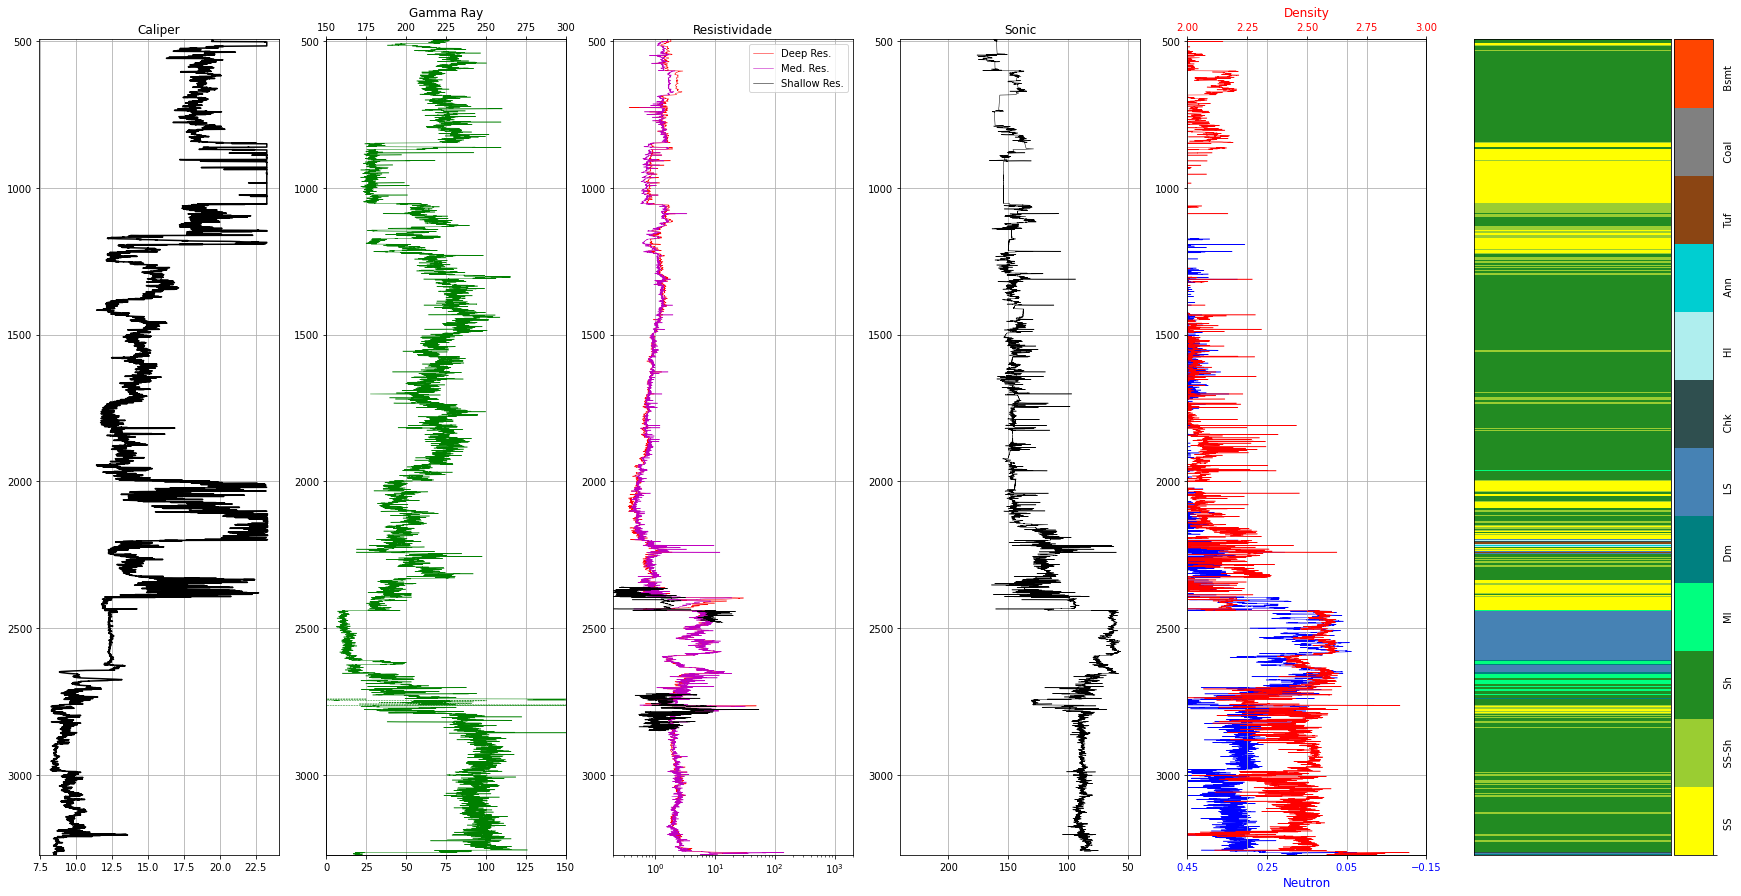

In [14]:
plotarPoco(dataset, well_number.value - 1)

Execute a célula abaixo para observar a distribuição dos poços em 2D e 3D.

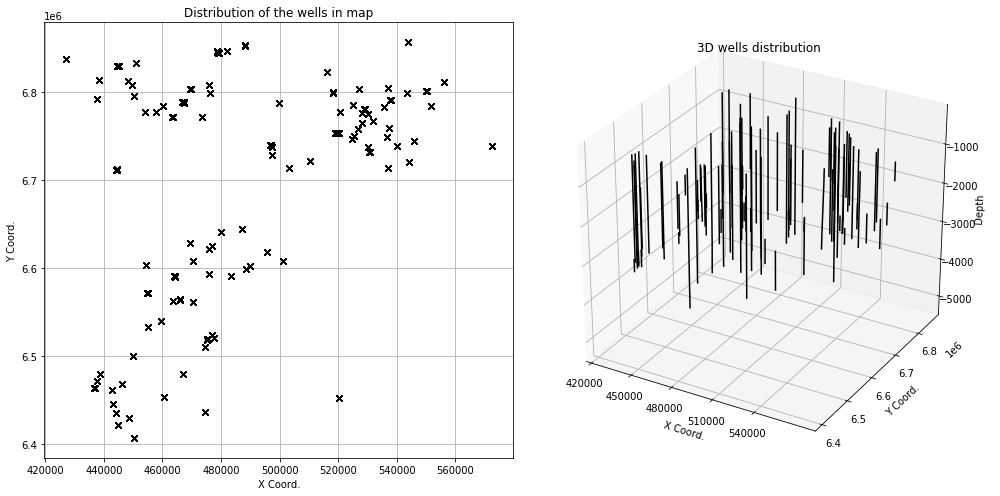

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))
ax[1].remove()
ax[1]=fig.add_subplot(1, 2, 2,projection='3d')

ax[0].set_xlabel('X Coord.')
ax[0].set_ylabel('Y Coord.')
ax[0].set_title('Distribution of the wells in map')
ax[0].grid()

ax[1].set_xlabel('X Coord.')
ax[1].set_ylabel('Y Coord.')
ax[1].set_zlabel('Depth')
ax[1].set_title('3D wells distribution')
ax[1].set_xticks(range(420000, 560000, 30000))

for well_name in dataset.WELL.unique():
  well = dataset[dataset.WELL == well_name]
  ax[1].plot(well.X_LOC, well.Y_LOC, well.Z_LOC, color = 'black')
  ax[0].plot(well.X_LOC, well.Y_LOC, 'kx')

fig.tight_layout()

Devemos observar ainda quais as rochas existentes nos nossos poços e sua ocorrência relativa. A partir disso, é importante discutir quais problemas podem surgir devido a uma ocorrência baixa de um tipo de rocha, havendo também um alto número de ocorrências de outro(s) tipo(s) de rocha.

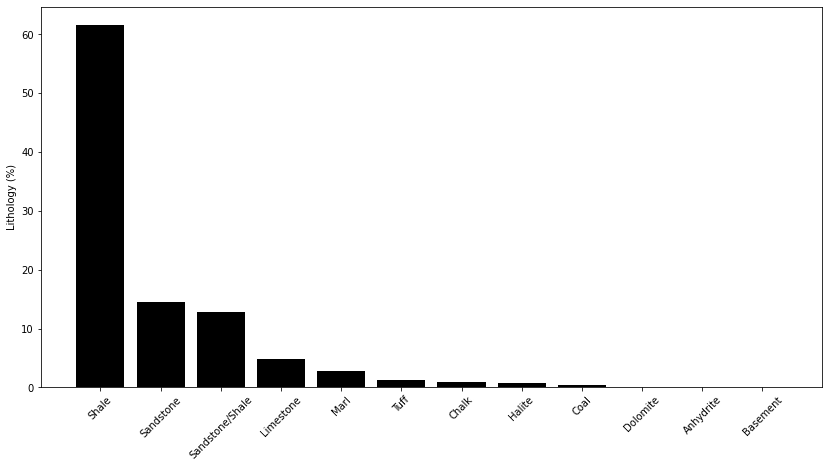

In [16]:
lithology_keys = {0: 'Sandstone',
                 1: 'Sandstone/Shale',
                 2: 'Shale',
                 3: 'Marl',
                 4: 'Dolomite',
                 5: 'Limestone',
                 6: 'Chalk',
                 7: 'Halite',
                 8: 'Anhydrite',
                 9: 'Tuff',
                 10: 'Coal',
                 11: 'Basement'}


counts = dataset['LITHOLOGY'].value_counts()
names = []
percentage = []
N = dataset['LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage, color = 'k')
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology (%)');